- for a given model, for each ligand that is Zn, check for atoms within 5 and 10 angstrom. turn this into a function, possibly a python script.
- make a 2d and 3d vidsual from the atoms center of mass, using then go into 3d the center of origin will be on the zinc ligand, look for offset from zinc atom
https://proteopedia.org/wiki/index.php/Hetero_atoms
HET
Non-standard residues

In [1]:
import atomium
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# %matplotlib notebook # must restart kernel to switch from widget to notebook, commnt out one
%matplotlib widget
from mpl_toolkits import mplot3d

#### Get Data

In [48]:
ligands = zinc_ligands(MODEL)

ligand_center = ligands[1].center_of_mass #ndarray
atoms = nearby_ligand_atoms(ligands[0], MODEL, radius=5.0)
# [{'atom': <Atom 3394 (ZN)>,
#   'location': (-11.953, 22.816, 27.173),
#   'distance': 0.0,
#   'is_metal': True,
#   'atom_id': 3394,
#   'near_hets': [<Residue CYS (A.111)>,
#    <Residue CYS (A.97)>,
#    <Residue CYS (A.103)>,
#    <Residue CYS (A.100)>]},
    # ...]

#### Plot data

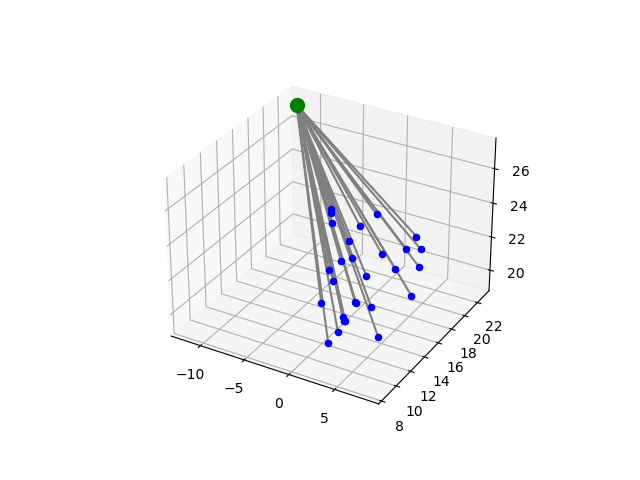

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for ligand center of mass
xdata = ligand_center[0]
ydata = ligand_center[1]
zdata = ligand_center[2]
ax.scatter3D(xdata, ydata, zdata, c="green", s=100);

# Data for atoms
for atom in atoms:
    xdata = atom["location"][0]
    ydata = atom["location"][1]
    zdata = atom["location"][2]
    ax.scatter3D(xdata, ydata, zdata, c='blue', s=20);
    ax.plot([xdata, ligand_center[0]],[ydata, ligand_center[1]],[zdata, ligand_center[2]], 'gray');
    
    
    


#### Globals

In [3]:
# The basic structures within a model are chains, residues, ligands, and atoms
# Biological molecules are hierarchical, building from atoms to residues to chains to assemblies

MODEL_NAME = "1ADG"
FILE = atomium.fetch(MODEL_NAME)
MODEL = atomium.fetch(MODEL_NAME).model
MODEL_CENTER_MASS = MODEL.center_of_mass
print(FILE.title)

CRYSTALLOGRAPHIC STUDIES OF TWO ALCOHOL DEHYDROGENASE-BOUND ANALOGS OF THIAZOLE-4-CARBOXAMIDE ADENINE DINUCLEOTIDE (TAD), THE ACTIVE ANABOLITE OF THE ANTITUMOR AGENT TIAZOFURIN


#### Helpers

In [4]:
def nearby_ligand_atoms(ligand, model, radius=10.0, sort_atoms=True):
    """
    Takes a ligand obj and a model's center of mass and returns a dictionary of atom data
    where the atoms fall within some set distance of the ligand's center
    
    - radius in angstroms
    - sort_atoms sorts the dict data structure by distance from ligand center
    """
    ligand_center = tuple(ligand.center_of_mass)
    atoms_in_radius = list(model.atoms_in_sphere(ligand_center, radius))
    
    atoms = []
    for idx, atom in enumerate(atoms_in_radius):
        atoms.append(
            {
                "atom": atom,
                "location": atom.location, #see Atom class: self._location = np.array([x, y, z])
                "distance": atom.distance_to(tuple(ligand.center_of_mass)),
                "is_metal": atom.is_metal,
                "atom_id": atom.id,
                "near_hets": list(atom.nearby_hets(cutoff=3))
            }
        )

    if sort_atoms:
        return sorted(atoms, key=lambda d: d["distance"]) 
    else:
        return atoms

In [5]:
def zinc_ligands(model, optimize=True):
    """
    For a given model name, query model via atomium API
    and return an array of any ZN ligand objects found in the model.
    
    model_name is a string, e.g. "1ADG"
    """
    # pdb = atomium.fetch(model_name) #should check for nil here i.e. does the model exist
    ligands = model.ligands()
    
    if optimize:
        model = model.optimise_distances()
    
    zn_ligands = []
    for ligand in ligands:
        if ligand.name == "ZN":
            zn_ligands.append(ligand)
    return zn_ligands

#### Testing

In [ ]:
# test

ligands = zinc_ligands(MODEL)
print(len(nearby_ligand_atoms(ligands[1], MODEL, radius=5.0)))
print(nearby_ligand_atoms(ligands[1], MODEL, radius=5.0))

# [{'atom': <Atom 3393 (ZN)>,
#   'distance': 0.0,
#   'is_metal': True,
#   'atom_id': 3393,
#   'near_hets': [<Water HOH (A.388)>,<Residue CYS (A.174)>,<Residue HIS (A.67)>,<Residue CYS (A.46)>]
#  },
#  {'atom': <Atom 3473 (O)>,
#   'distance': 1.6169613477136673,
#   'is_metal': False,
#   'atom_id': 3473,
#   'near_hets': [<Ligand ZN (A.376)>,<Residue CYS (A.174)>,<Residue SER (A.48)>,<Water HOH (A.391)>,<Residue HIS (A.67)>]
#  },
#    ...


# hets:
# sorted_dist_to_lig_a376[1]["atom"].nearby_hets(cutoff=3)
# ...
# {<Ligand ZN (A.376)>,
#  <Residue CYS (A.174)>,
#  <Residue HIS (A.67)>,
#  <Residue SER (A.48)>,
#  <Water HOH (A.391)>}

#### notes

Proteins are the major ligands for zinc(II) ions (“zinc”). Zinc can be readily available from proteins or not available at all unless the protein is degraded. In a way, the coordination chemistry of zinc in proteins bridges the one in natural waters, where zinc is in an available form, and the one in minerals, where zinc is unavailable without chemical processing. Zinc is essential for virtually all cellular functions through its presence in an estimated 3000 human proteins, the zinc sites of which have been predicted by bioinformatics approaches from the signature motifs in their protein sequences [1]. If one considers additional functions of zinc in regulation, the number of zinc proteins in the human zinc proteome will be even larger [2]. 

The coordination chemistry of zinc in proteins and peptides involves N, O, and S donors of the side chains of histidine, glutamate/aspartate, and/or cysteine with any permutation of these ligands and with the number of protein ligands ranging from three to six. The ligands may not stem from a single protein but from up to four proteins. One property regularly cited for zinc is its flexibility in coordination due to the lack of ligand field stabilization. This allows for dynamic coordination environments of zinc ions, which is critical for example in its catalytic prowess in enzymes when adopting different coordination numbers in interactions with substrates. 

A critical chemical issue that is important for the functions of proteins is their affinity towards zinc. Using a limited number of ligand donors and geometries, proteins must control and adjust affinities for zinc according to physiological functions. These functions are determined by the structural properties of zinc binding sites such as the presence of a second coordination sphere that engages in hydrogen bonding to ligands, including water molecules when present, geometric strains (entasis), pockets with different dielectric constants (hydrophobic cores), all of which modulate the properties of the bound zinc. For example, in zinc fingers with a ββα fold and in zinc-containing LIM domains, hydrogen bonds and hydrophobic and electrostatic interactions around the bound zinc affect binding and exchange kinetics [3], [4]. Such stabilization through interactions in the second coordination sphere, though not always directly obvious from inspection of the protein structure, occurs in both intra- or intermolecular zinc binding sites and is responsible for stabilizing some sites to affinities for zinc as high as femtomolar in zinc-binding domains such as the zinc hook [5]. A lack or a limited number of stabilizing secondary interactions also can have the opposite effect, namely decreasing affinities of proteins for zinc as a way of controlling their function [6]. 

Zinc coordination in proteins has been reviewed and catalogued extensively and hence is not the subject of this article. An important subject that has not been reviewed in the literature, however, is the biological coordination chemistry of zinc ions when not bound to proteins – the focus of this article. This subject matter is important with regard to the way zinc is controlled in biology and the functions of zinc as a signalling ion as discussed in many articles in this special issue.

a residue refers to a single unit that makes up a polymer (biopolymer: Starch, proteins and peptides, DNA, and RNA are all examples of biopolymers, in which the monomer units, respectively, are sugars, amino acids, and nucleotides.), such as an amino acid in a polypeptide or protein

(1) A molecule, ion or atom bonded to the central metal atom of a coordination compound (A substance consisting of atoms or ions of two or more elements that are chemically bonded together, e.g. carbon dioxide, a substance consisting of carbon and two oxygen atoms).
(2) Any substance (e.g. hormone, drug, functional group, etc.) that binds specifically and reversibly to another chemical entity to form a larger complex.


